The train Deep Learning models on the `cats and dogs` images dataset to accurately classify the animal in the image.






**Requirements:**

1. Import all necessary libraries for the Deep Learning project.
2. Download the dataset (the link is provided below).
3. Make sure to convert the target into one hot vector.
4. Create data pipeline with data augmentation.
    1. Read images using tensorflow.
    2. Make sure the pixels values are scaled between (`0-1`).
    3. Resize the images to (224,224).
    4. Apply multiple image augmentation on the data.
    5. Make sure the augmentation image pixels are scaled between (`0-1`). 
5. Plot the images.
6. Train CNN models (try ResNet architecture).
**Note:** use sub-class to create the ResNet model.


7. Use multiple Transfer Learning models.<br>



[Dataset](https://www.kaggle.com/aseemdandgaval/23-pet-breeds-image-classification)




# 1- Import all necessary libraries for the Deep Learning project

In [ ]:
# import the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics
import os
import glob
import tqdm

# 2- Download the dataset

In [ ]:
# download the required dataset from kaggle 

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d aseemdandgaval/23-pet-breeds-image-classification

 98% 775M/794M [00:04<00:00, 205MB/s]
100% 794M/794M [00:04<00:00, 200MB/s]


In [ ]:
! unzip /content/23-pet-breeds-image-classification.zip

Archive:  /content/23-pet-breeds-image-classification.zip
  inflating: Pet_Breeds/abyssinian/abyssinian_1.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_10.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_100.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_101.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_102.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_103.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_104.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_105.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_106.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_107.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_108.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_109.jpeg  
  inflating: Pet_Breeds/abyssinian/abyssinian_11.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_110.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_111.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_112.jpg  
  inflating: Pet_Breeds/abyssinian/abyssinian_113

In [ ]:
def creat_Dataframe(train_path):
  # Create the arrays that will hold the paths and labels
  labels=[]
  images_path=[]
  folders = os.listdir(train_path)
  ext=['jpg','jpeg']
  

  for label in tqdm .tqdm(range(len(folders))):
    for type in ext:
      for path in glob.glob(train_path+'/'+folders[label]+f"/*.{type}"):

        # Append the image path and label to the arrays we defined earlier
        images_path.append(path)
        labels.append(label)

#creatE the dataframe
  data=pd.DataFrame({'path':images_path,'labels':labels})
  return data
data=creat_Dataframe('/content/Pet_Breeds')  

100%|██████████| 23/23 [00:00<00:00, 293.34it/s]


In [ ]:
#show the data
data

,path,labels
0,/content/Pet_Breeds/labrador/labrador_75.jpg,0
1,/content/Pet_Breeds/labrador/labrador_81.jpg,0
2,/content/Pet_Breeds/labrador/labrador_5.jpg,0
3,/content/Pet_Breeds/labrador/labrador_166.jpg,0
4,/content/Pet_Breeds/labrador/labrador_64.jpg,0
...,...,...
3823,/content/Pet_Breeds/husky/husky_23.jpg,22
3824,/content/Pet_Breeds/husky/husky_116.jpg,22
3825,/content/Pet_Breeds/husky/husky_75.jpeg,22
3826,/content/Pet_Breeds/husky/husky_111.jpeg,22


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f605c5ecdd0>]],
      dtype=object)

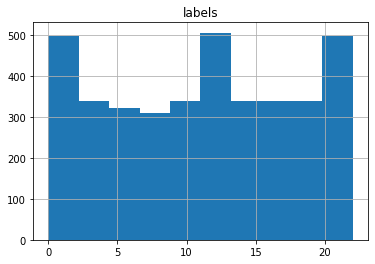

In [ ]:
#plot histgram
data.hist()

# 4- Create Data Pipeline with Data Augmentation


In [ ]:
# read images file from file path
def read_images(x,y):
  
     x=tf.io.read_file(x)# Read and output the entire contents of the input file.
     x=tf.image.decode_jpeg(x,channels=3)# Convert the content of the file to a 3D Tensor (height, width, color_channels).
     x=tf.image.convert_image_dtype(x,tf.float32)# Convert the tensor values
     x=tf.image.resize(x,(224,224))#Resize the image to a fixed square size of 224 by 224

     return x, y

def image_aug(x,y):
  x=tf.image.random_flip_left_right(x)# Randomly flip an image horizontally
  x=tf.image.random_flip_up_down(x)# Randomly flips an image vertically
  x=tf.image.random_brightness(x,max_delta=32/255)# Adjust the brightness of images by a random factor
  x=tf.image.random_saturation(x,lower=0.5,upper=1.5)# Adjust the saturation of RGB images by a random factor
  x=tf.clip_by_value(x,0.0,1.0)
  return x,y       




In [ ]:
#check if image is corrupted
error_path=[] 
for i in tqdm.tqdm(range(len(data.path))):
  try:
    read_images(data.path[i],0)
  except:
    error_path.append(i)  

100%|██████████| 3828/3828 [02:40<00:00, 23.83it/s]


In [ ]:
error_path

[673, 849, 1265, 1495, 2699]

In [ ]:
# Drop the rows that have missing values 
data.drop(error_path,inplace=True)

In [ ]:
#split the datasets to train and test
x_train,x_test,y_train , y_test = model_selection.train_test_split(data.path,data.labels ,
                                                                    test_size = 0.2, stratify=data.labels)

In [ ]:
# check the shape of the following (x_train, y_train and x_test, y_test)
print('x_train :', x_train.shape)
print('y_train :',y_train.shape)
print('x_test :' ,x_test.shape)
print('y_test :' ,y_test.shape)

x_train : (3058,)
y_train : (3058,)
x_test : (765,)
y_test : (765,)


#3-Make sure to convert the target into one hot vector.

In [ ]:
# convert the labels to one hot vector
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))

In [ ]:
print('y_train_hot :',y_train_hot.shape)
print('y_test_hot: ',y_test_hot.shape)

y_train_hot : (3058, 23)
y_test_hot:  (765, 23)


In [ ]:
# create the data pipline 
def dataset_creater(x,y,training=True):
  # Convert image paths to image tensors using get_image_tensor_from_path
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(1028) # Shuffle the data
    data=data.map(read_images,num_parallel_calls=tf.data.AUTOTUNE)
    if training:
      data=data.map(image_aug,num_parallel_calls=tf.data.AUTOTUNE)
    data=data.batch(32) # Create mini-batches for the specified size
    # This allows later elements to be prepared while the current element is being processed.
    data=data.prefetch(tf.data.AUTOTUNE)  
    return data

train_dataset=dataset_creater(x_train,y_train_hot) 
test_dataset=dataset_creater(x_test,y_test_hot,training=False)

# 5- Plot the images 

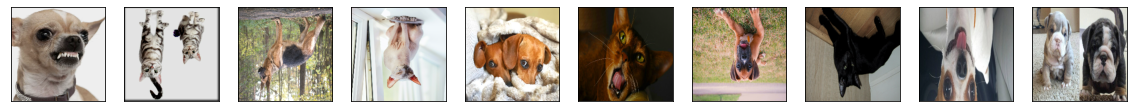

In [ ]:
# plot the augmented images 
n=10
plt.figure(figsize=(20,4))
for x,y in train_dataset.take(1):
  for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(tf.squeeze(x[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  

# 6- Modeling
**Note:**
1. Train CNN models (try ResNet architecture).
1. Make sure to separate each model in a new sub-section.
2. Use multiple Transfer Learning models.
4. Use the right evaluation metrics to choose the best model (write down your choice of the best model).

## CNN Model
### Resnet Blocks 
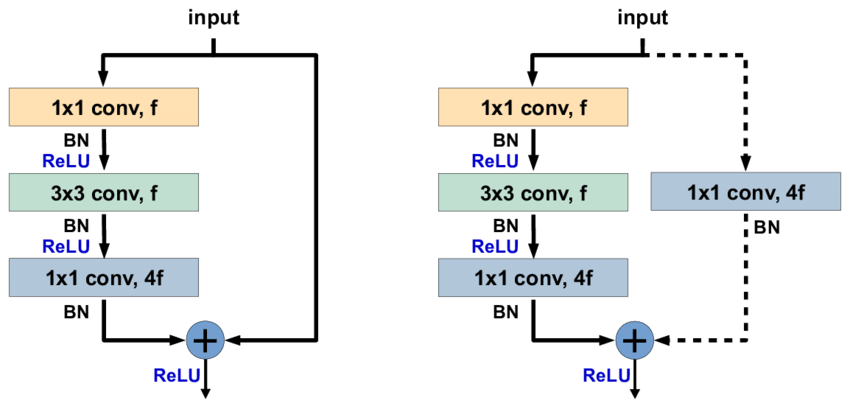

##1-ResNet Model

In [ ]:
class IdenticalBlock(tf.keras.layers.Layer):
    def __init__(self,filters):
        f1,f2=filters
        super(IdenticalBlock,self).__init__()
        #layer 1
        self.Conv1=tf.keras.layers.Conv2D(filters=f1,kernel_size=(1,1),use_bias=False,padding='valid')
        self.BN1=tf.keras.layers.BatchNormalization()
        #layer 2
        self.Conv2=tf.keras.layers.Conv2D(filters=f1,kernel_size=(3,3),use_bias=False,padding='same')
        self.BN2=tf.keras.layers.BatchNormalization()
        #layer 3
        self.Conv3=tf.keras.layers.Conv2D(filters=f2,kernel_size=(1,1),use_bias=False,padding='valid')
        self.BN3=tf.keras.layers.BatchNormalization()
    def call(self,x):
        x_skip=x
        #layer 1
        
        Conv1=self.Conv1(x)
        BN1=self.BN1(Conv1)
        BN1=tf.nn.leaky_relu(BN1)

        #layer 2

        Conv2=self.Conv2(BN1)
        BN2=self.BN2(Conv2)
        BN2=tf.nn.leaky_relu(BN2)

        #layer 3 

        Conv3=self.Conv3(BN2)
        BN3=self.BN3(Conv3)

        #add the output of layer 3 with the input 

        add=tf.keras.layers.Add()([BN3,x_skip])

        add=tf.nn.leaky_relu(add)

        return add

    def build_model(self,shape=(224,224,3)):
        inputs=tf.keras.layers.Input(shape=shape)
        return tf.keras.Model(inputs=[inputs],outputs=[self.call(inputs)])

identical_block=IdenticalBlock(filters=[64,3])
identical_block.build_model().summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  192         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                             

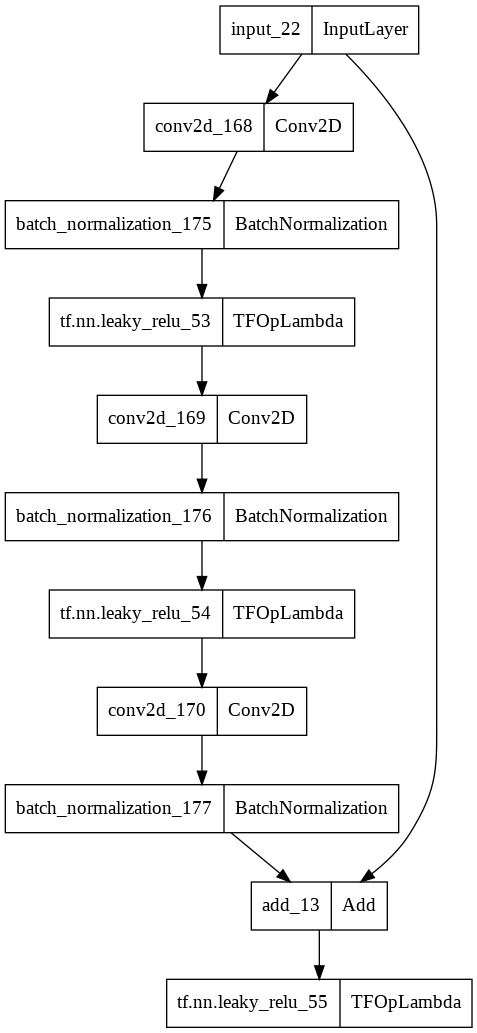

In [ ]:

tf.keras.utils.plot_model(identical_block.build_model())

In [ ]:
class ConvBlock(tf.keras.layers.Layer):
    def __init__(self,filters,strides=(1, 1)):
        f1,f2=filters
        super(ConvBlock,self).__init__()
        #layer 1 path 1
        self.Conv1=tf.keras.layers.Conv2D(filters=f1,kernel_size=(1,1),strides=strides,use_bias=False,padding='valid')
        self.BN1=tf.keras.layers.BatchNormalization()
        #layer 2 path 1
        self.Conv2=tf.keras.layers.Conv2D(filters=f1,kernel_size=(3,3),use_bias=False,padding='same')
        self.BN2=tf.keras.layers.BatchNormalization()
        #layer 3 path 1
        self.Conv3=tf.keras.layers.Conv2D(filters=f2,kernel_size=(1,1),use_bias=False,padding='valid')
        self.BN3=tf.keras.layers.BatchNormalization()

        #layer 1 path 2 
        self.Conv4=tf.keras.layers.Conv2D(filters=f2,kernel_size=(1,1),strides=strides,use_bias=False,padding='valid')
        self.BN4=tf.keras.layers.BatchNormalization()



        
    def call(self,x):
        x_skip=x
        x_skip=self.Conv4(x_skip)
        x_skip=self.BN4(x_skip)
        #layer 1
        
        Conv1=self.Conv1(x)
        BN1=self.BN1(Conv1)
        BN1=tf.nn.leaky_relu(BN1)

        #layer 2

        Conv2=self.Conv2(BN1)
        BN2=self.BN2(Conv2)
        BN2=tf.nn.leaky_relu(BN2)

        #layer 3 

        Conv3=self.Conv3(BN2)
        BN3=self.BN3(Conv3)

        #add the output of layer 3 with the input 


        add=tf.keras.layers.Add()([BN3,x_skip])

        add=tf.nn.leaky_relu(add)

        return add

    def build_model(self,shape=(224,224,3)):
        inputs=tf.keras.layers.Input(shape=shape)
        return tf.keras.Model(inputs=[inputs],outputs=[self.call(inputs)])

conv_block=ConvBlock(filters=[64,128],strides=(2,2))
conv_block.build_model().summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 112, 112, 64  192         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 112, 112, 64  256        ['conv2d_3[0][0]']               
 rmalization)                   )                                                           

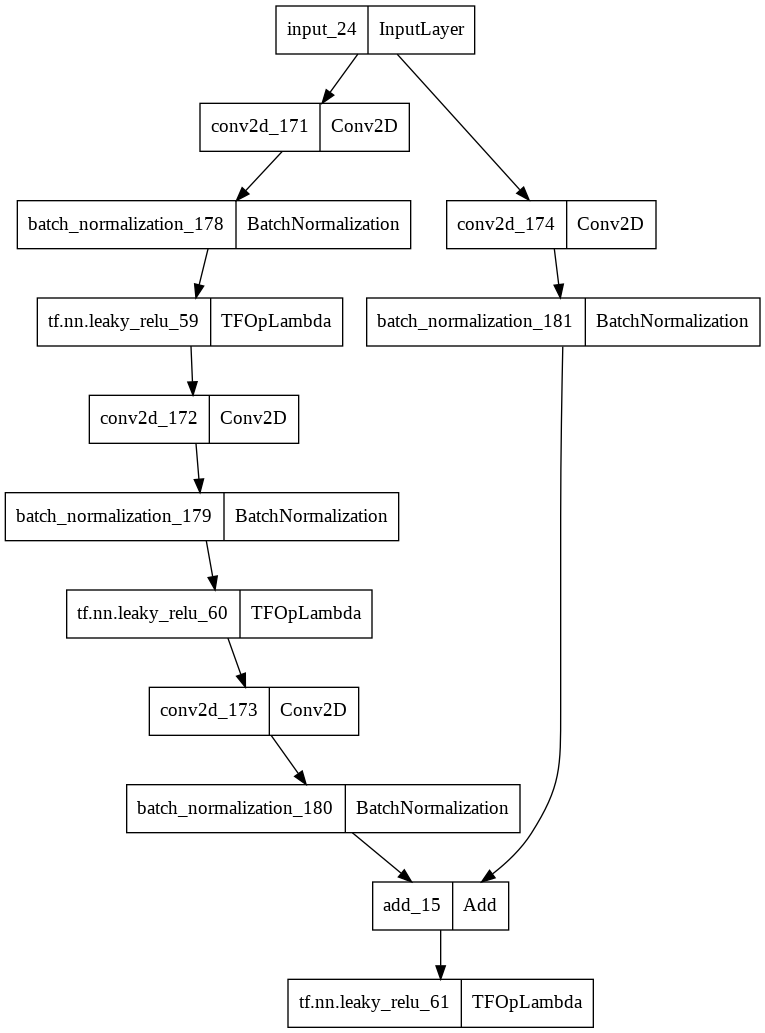

In [ ]:
tf.keras.utils.plot_model(conv_block.build_model())

In [ ]:
class ResNet(tf.keras.models.Model):
    def __init__(self):
        super(ResNet,self).__init__()

        #block 1
        self.input_conv=tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),use_bias=False,padding='same')

        self.BN1=tf.keras.layers.BatchNormalization()
        self.MaxPool=tf.keras.layers.MaxPool2D()
        #block 2
        self.identical_block_1=IdenticalBlock(filters=[64,32])
        #block 3
        self.identical_block_2=IdenticalBlock(filters=[64,32])
        #block 4
        self.conv_block_3=ConvBlock(filters=[128,64],strides=(2,2))
        #block 5
        self.identical_block_4=IdenticalBlock(filters=[128,64])
        #block 6
        self.identical_block_5=IdenticalBlock(filters=[128,64])
        #block 7
        self.conv_block_6=ConvBlock(filters=[128,64],strides=(2,2))
        #MPL block 

        self.D1=tf.keras.layers.Dense(units=256,use_bias=False)
        self.BN2=tf.keras.layers.BatchNormalization()
        self.OUT=tf.keras.layers.Dense(units=23)

    def call(self,inputs):
        x=inputs
        x=self.input_conv(x)
        x=self.BN1(x)
        x=tf.nn.leaky_relu(x)
        x=self.MaxPool(x)
        x=self.identical_block_1(x)
        x=self.identical_block_2(x)
        x= self.conv_block_3(x)
        x=self.identical_block_4(x)
        x=self.identical_block_5(x)
        x=self.conv_block_6(x)
        x=tf.keras.layers.Flatten()(x)
        x=self.D1(x)
        x=self.BN2(x)
        x=tf.nn.leaky_relu(x)
        output=tf.nn.softmax(self.OUT(x))

        return output 
    def build_model(self,shape=(224,224,3)):
        inputs=tf.keras.layers.Input(shape=shape)
        return tf.keras.Model(inputs=[inputs],outputs=[self.call(inputs)])

In [ ]:
#build the model ResNet
model=ResNet()
model.build_model().summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      2400      
                                                                 
 batch_normalization_7 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 tf.nn.leaky_relu_6 (TFOpLam  (None, 224, 224, 32)     0         
 bda)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                           

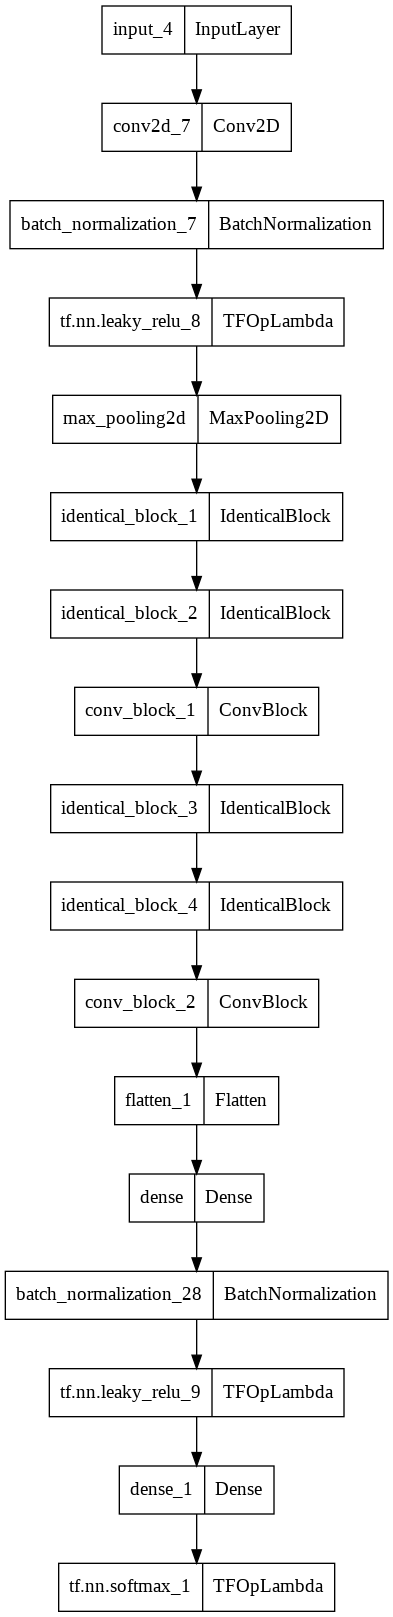

In [ ]:
tf.keras.utils.plot_model(model.build_model())

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

model.fit(train_dataset, epochs=5, validation_data=test_dataset)


Epoch 1/5
96/96 [==============================] - 110s 1s/step - loss: 3.1596 - accuracy: 0.1095 - val_loss: 4.3066 - val_accuracy: 0.0444
Epoch 2/5
96/96 [==============================] - 94s 980ms/step - loss: 2.7853 - accuracy: 0.1831 - val_loss: 4.7944 - val_accuracy: 0.0484
Epoch 3/5
96/96 [==============================] - 98s 1s/step - loss: 2.6660 - accuracy: 0.2145 - val_loss: 3.8775 - val_accuracy: 0.0784
Epoch 4/5
96/96 [==============================] - 107s 1s/step - loss: 2.5067 - accuracy: 0.2528 - val_loss: 3.2773 - val_accuracy: 0.1033
Epoch 5/5
96/96 [==============================] - 99s 1s/step - loss: 2.3041 - accuracy: 0.3231 - val_loss: 3.3204 - val_accuracy: 0.0889


In [ ]:
#evalution
loss, accuracy = model.evaluate(train_dataset.repeat(), steps=10)
print("Loss :", loss)
print("Accuracy :", accuracy)


10/10 [==============================] - 12s 1s/step - loss: 2.9346 - accuracy: 0.1813
Loss : 2.934553861618042
Accuracy : 0.18125000596046448


##2-ImageNet

In [ ]:
# create model by Dense
model_1=tf.keras.applications.DenseNet201(include_top=False,input_shape=(224,224,3))


74850304/74836368 [==============================] - 2s 0us/step


In [ ]:
len(model_1.layers)
for layer in model_1.layers[:650]:
  layer.trainable=False
for layer in model_1.layers[650:]:
  layer.trainable=False

In [ ]:
model_1.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [ ]:

model=tf.keras.Sequential([
                           model_1,
                           tf.keras.layers.GlobalAveragePooling2D(),
                           tf.keras.layers.Dense(23,activation=tf.nn.softmax)

                           


])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 23)                44183     
                                                                 
Total params: 18,366,167
Trainable params: 44,183
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
model_1.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
mod=model_1.fit(train_dataset,epochs=8,validation_data=test_dataset)

Epoch 1/8
96/96 [==============================] - 1004s 10s/step - loss: 1.8989 - acc: 0.4765 - val_loss: 0.8196 - val_acc: 0.7974
Epoch 2/8
96/96 [==============================] - 891s 9s/step - loss: 0.9529 - acc: 0.7466 - val_loss: 0.5080 - val_acc: 0.8863
Epoch 3/8
96/96 [==============================] - 886s 9s/step - loss: 0.7218 - acc: 0.8015 - val_loss: 0.4606 - val_acc: 0.8824
Epoch 4/8
96/96 [==============================] - 903s 9s/step - loss: 0.6075 - acc: 0.8221 - val_loss: 0.4082 - val_acc: 0.9020
Epoch 5/8
96/96 [==============================] - 909s 9s/step - loss: 0.5380 - acc: 0.8522 - val_loss: 0.4033 - val_acc: 0.9098
Epoch 6/8
96/96 [==============================] - 909s 9s/step - loss: 0.4700 - acc: 0.8734 - val_loss: 0.3803 - val_acc: 0.9046
Epoch 7/8
96/96 [==============================] - 917s 10s/step - loss: 0.4341 - acc: 0.8862 - val_loss: 0.3785 - val_acc: 0.9085
Epoch 8/8
96/96 [==============================] - 942s 10s/step - loss: 0.4110 - acc: 

In [ ]:
#evalution
loss, accuracy = model_1.evaluate(train_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 76s 8s/step - loss: 0.3445 - acc: 0.9201
Loss : 0.34449055790901184
Accuracy : 0.9201388955116272


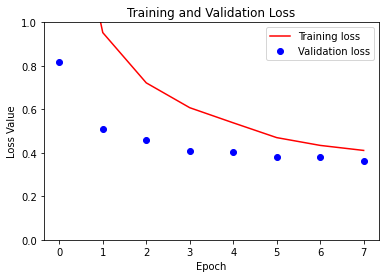

In [ ]:
loss = mod.history['loss']
val_loss = mod.history['val_loss']

plt.figure()
plt.plot(mod.epoch, loss, 'r', label='Training loss')
plt.plot(mod.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
#build model by xception
model_2=tf.keras.applications.Xception(include_top=False,input_shape=(224,224,3))


83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
len(model_2.layers)
for layer in model_2.layers[:650]:
  layer.trainable=False
for layer in model_2.layers[650:]:
  layer.trainable=False

In [ ]:
model_2.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
model_2=tf.keras.Sequential([
                           model_2,
                           tf.keras.layers.GlobalAveragePooling2D(),
                           tf.keras.layers.Dense(23,activation=tf.nn.softmax)

                           


])

In [ ]:
model_2.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
model2=model_2.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
96/96 [==============================] - 768s 8s/step - loss: 1.4763 - acc: 0.6046 - val_loss: 0.5592 - val_acc: 0.8484
Epoch 2/5
96/96 [==============================] - 716s 7s/step - loss: 0.8080 - acc: 0.7613 - val_loss: 0.4611 - val_acc: 0.8667
Epoch 3/5
96/96 [==============================] - 716s 7s/step - loss: 0.6910 - acc: 0.7920 - val_loss: 0.4460 - val_acc: 0.8797
Epoch 4/5
96/96 [==============================] - 716s 7s/step - loss: 0.6086 - acc: 0.8182 - val_loss: 0.4135 - val_acc: 0.8902
Epoch 5/5
96/96 [==============================] - 717s 7s/step - loss: 0.5529 - acc: 0.8342 - val_loss: 0.4060 - val_acc: 0.8824


In [ ]:
#evalution
loss, accuracy = model_2.evaluate(train_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 72s 7s/step - loss: 0.4217 - acc: 0.8750
Loss : 0.42168477177619934
Accuracy : 0.875


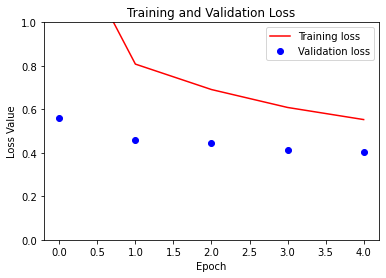

In [ ]:
loss = model2.history['loss']
val_loss = model2.history['val_loss']

plt.figure()
plt.plot(model2.epoch, loss, 'r', label='Training loss')
plt.plot(model2.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
# create a model by InceptionResNetV2
model_3=tf.keras.applications.InceptionResNetV2(include_top=False,input_shape=(224,224,3))
len(model_3.layers)
for layer in model_3.layers[:650]:
  layer.trainable=False
for layer in model_3.layers[650:]:
  layer.trainable=False

model_3.summary()  

219070464/219055592 [==============================] - 1s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 111, 111, 32  96         ['conv2d_4[0][0]']               
 rmalization)

In [ ]:
model_3=tf.keras.Sequential([
                           model_3,
                           tf.keras.layers.GlobalAveragePooling2D(),
                           tf.keras.layers.Dense(23,activation=tf.nn.softmax)

                           


])

In [ ]:
model_3.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=['acc'])
model3=model_3.fit(train_dataset,epochs=3,validation_data=test_dataset)

Epoch 1/3
96/96 [==============================] - 1005s 10s/step - loss: 1.3518 - acc: 0.6037 - val_loss: 0.4561 - val_acc: 0.8549
Epoch 2/3
96/96 [==============================] - 974s 10s/step - loss: 0.7846 - acc: 0.7655 - val_loss: 0.4248 - val_acc: 0.8784
Epoch 3/3
96/96 [==============================] - 976s 10s/step - loss: 0.7363 - acc: 0.7714 - val_loss: 0.4060 - val_acc: 0.8863


In [ ]:
#evalution
loss, accuracy = model_3.evaluate(train_dataset.repeat(), steps=9)
print("Loss :", loss)
print("Accuracy :", accuracy)

9/9 [==============================] - 73s 8s/step - loss: 0.6985 - acc: 0.7882
Loss : 0.6985294818878174
Accuracy : 0.7881944179534912


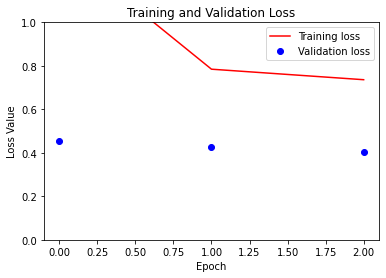

In [ ]:
loss = model3.history['loss']
val_loss = model3.history['val_loss']

plt.figure()
plt.plot(model3.epoch, loss, 'r', label='Training loss')
plt.plot(model3.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [1]:
#The best model is DenseNet201